In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import requests


In [2]:
# url = 'https://github.com/alfredwisana/computer-vision/raw/main/Alfred/week%204%20(frequence)/cv2.png'

In [3]:
# response = requests.get(url)
# image_bytes = np.frombuffer(response.content, np.uint8)


In [4]:
# image = cv.imdecode(image_bytes, cv.IMREAD_GRAYSCALE)
image=cv.imread('cv2.png',cv.IMREAD_GRAYSCALE)


In [5]:
height, width = image.shape[:2]

print("Image width:", width)
print("Image height:", height)

Image width: 512
Image height: 512


In [6]:
f = np.fft.fft2(image)

fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

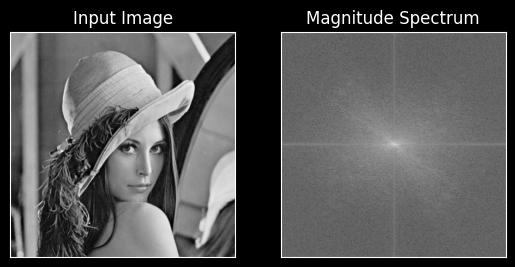

In [7]:
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
# image=np.int32(image)

In [9]:
f_ishift = np.fft.ifftshift(fshift)
image_back = np.fft.ifft2(f_ishift)
image_back = np.abs(image_back)
image_back = np.uint32(image_back)

(-0.5, 511.5, 511.5, -0.5)

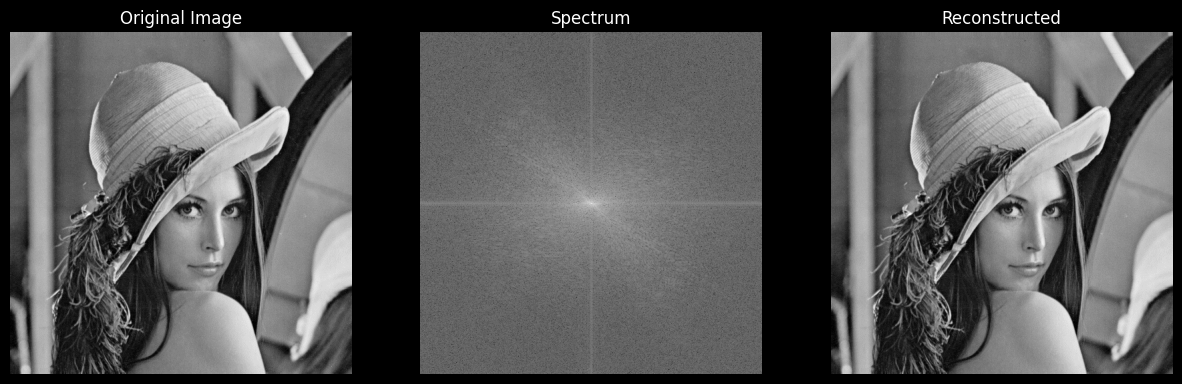

In [10]:
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Spectrum')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image_back,cmap='gray')
plt.title('Reconstructed')
plt.axis('off')


In [11]:
if (image[0,150] == image_back[0,150]):
    print('sama')
else:
    print('Tidak Sama')

sama


Array dari gambar asli dan array dari gambar yang dikembalikan setelah dilakukan transformasi fourier adalah sama

Filter

In [12]:
def high_pass_filter(rows, cols, cut_off):

    crow, ccol = rows // 2, cols // 2
    x,y = np.ogrid[:rows, :cols]
    mask = np.ones((rows, cols), np.float32)
    mask_area = (x-crow)**2 + (y-ccol)**2 <= cut_off**2
    mask[mask_area] = 0
    return mask

In [13]:
def inverse_image(image):
    f_ishift = np.fft.ifftshift(image)
    image_back_filter = np.fft.ifft2(f_ishift)
    image_back_filter = np.abs(image_back_filter)

    return image_back_filter

In [14]:
#Gaussian Ideal Filter

kernel_size = 21
x = cv.getGaussianKernel(kernel_size,10)
gaussian_filter = x*x.T
fft_filter= np.fft.fft2(gaussian_filter)
fft_shift = np.fft.fftshift(fft_filter)
mag_spec = np.log(np.abs(fft_shift))
rows, cols = image.shape
crow, ccol = (rows-kernel_size) // 2, (cols-kernel_size) // 2
d = 30  # Cut-off frequency (adjust as needed)
mask = np.zeros((rows, cols), np.float32)
mask[crow:crow+kernel_size, ccol:ccol+kernel_size] = gaussian_filter
filter_image = fshift * mask
filter_image = inverse_image(filter_image)

In [15]:
hpf_mask_30 = fshift * high_pass_filter(width, height, 30)
hpf_mask_30 = inverse_image(hpf_mask_30)

In [16]:
hpf_mask_50 = fshift * high_pass_filter(width, height, 50)
hpf_mask_50 = inverse_image(hpf_mask_50)

In [17]:
hpf_mask_100 = fshift * high_pass_filter(width, height, 100)
hpf_mask_100 = inverse_image(hpf_mask_100)

In [18]:
hpf_mask_1000 = fshift * high_pass_filter(width, height, 1000)
hpf_mask_1000 = inverse_image(hpf_mask_1000)

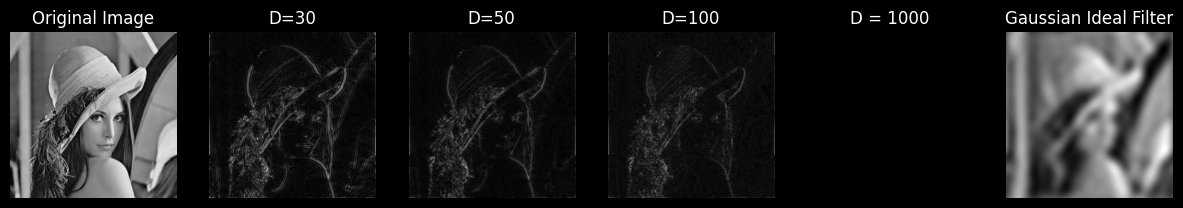

In [19]:
plt.figure(figsize=(15,15))

plt.subplot(1,6,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,6,2)
plt.imshow(hpf_mask_30,cmap='gray')
plt.title('D=30')
plt.axis('off')

plt.subplot(1,6,3)
plt.imshow(hpf_mask_50,cmap='gray')
plt.title('D=50')
plt.axis('off')

plt.subplot(1,6,4)
plt.imshow(hpf_mask_100,cmap='gray')
plt.title('D=100')
plt.axis('off')

plt.subplot(1,6,5)
plt.imshow(hpf_mask_1000,cmap='gray')
plt.title('D = 1000')
plt.axis('off')

plt.subplot(1,6,6)
plt.imshow(filter_image,cmap='gray')
plt.title('Gaussian Ideal Filter')
plt.axis('off')


plt.show()


LOW PASS FILTER

In [20]:
def low_pass_filter(rows, cols, cut_off):

    crow, ccol = rows // 2, cols // 2
    x,y = np.ogrid[:rows, :cols]
    mask = np.zeros((rows, cols), np.float32)
    mask_area = (x-crow)**2 + (y-ccol)**2 <= cut_off**2
    mask[mask_area] = 1
    return mask    

In [21]:
lpf_mask_30 = fshift * low_pass_filter(width, height, 30)
lpf_mask_30 = inverse_image(lpf_mask_30)

In [22]:
lpf_mask_50 = fshift * low_pass_filter(width, height, 50)
lpf_mask_50 = inverse_image(lpf_mask_50)

In [23]:
lpf_mask_100 = fshift * low_pass_filter(width, height, 100)
lpf_mask_100 = inverse_image(lpf_mask_100)

In [24]:
lpf_mask_1000 = fshift * high_pass_filter(width, height, 1000)
lpf_mask_1000 = inverse_image(lpf_mask_1000)

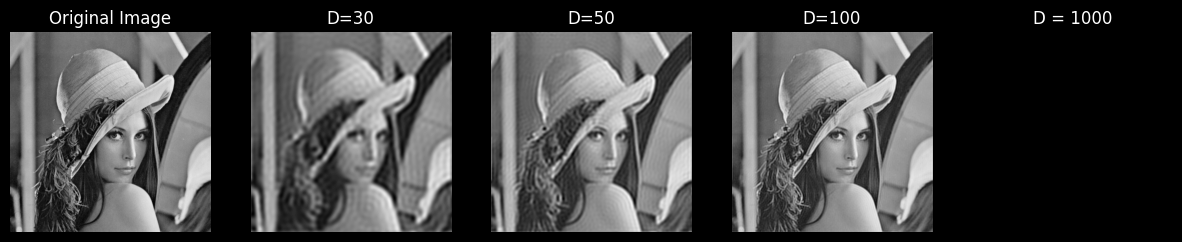

In [25]:
plt.figure(figsize=(15,15))

plt.subplot(1,5,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(lpf_mask_30,cmap='gray')
plt.title('D=30')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(lpf_mask_50,cmap='gray')
plt.title('D=50')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(lpf_mask_100,cmap='gray')
plt.title('D=100')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(lpf_mask_1000,cmap='gray')
plt.title('D = 1000')
plt.axis('off')


plt.show()


Butter